In [1]:
from hypatie.transform import angular_sepration
from hypatie.simbad import sql2df, object_type
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
https://simbad.u-strasbg.fr/simbad/sim-id?Ident=NAME+Sgr+A*
NAME Sgr A* -- X-ray source
ICRS coord. (ep=J2000) : 17 45 40.03599 -29 00 28.1699 (Radio)
TO BE CHECKED:
J/ApJ/821/44
"""
df = sql2df("select main_id, ra, dec from basic where main_id='Sgr A*'")
df[['ra','dec']] = df[['ra','dec']].astype(float)
ra, dec = df.ra.iloc[0], df.dec.iloc[0]
print(ra,dec)

266.41681662499997 -29.00782497222222


In [3]:
sql = f""" SELECT main_id, otype_txt, update_date, ra, dec, pmra, pmdec, rvz_redshift
FROM basic
WHERE CONTAINS(POINT('ICRS', ra, dec), CIRCLE('ICRS', {ra}, {dec}, 0.001)) = 1
"""

df = sql2df(sql)

In [4]:
df[['ra','dec']] = df[['ra','dec']].astype(float)

for col in ['pmra', 'pmdec', 'rvz_redshift']:
    df.loc[df[col]=='', col] = np.nan
    df[col] = df[col].astype(float)

In [5]:
ls = []
for ind, v in df.iterrows():
    ls.append(angular_sepration(ra, dec, v['ra'], v['dec']))

df['sep'] = ls
df = df.sort_values('sep')

otype_txt = [i[1:-1] for i in df['otype_txt']]
df['otype_txt'] = otype_txt

In [6]:
df['star'] = False
df.loc[df['otype_txt'].isin(object_type('star')), 'star'] = True

In [7]:
df['pm_mag'] = df['pmra']**2 + df['pmdec']**2

In [8]:
stars = df[df['star']==True]
nonstars = df[df['star']==False]

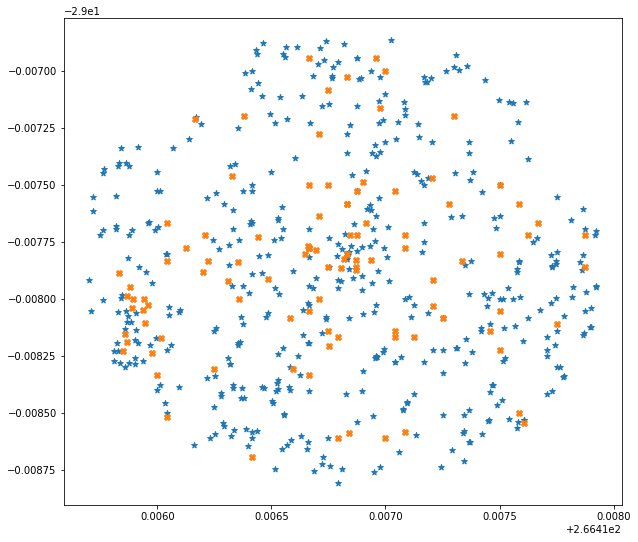

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(stars['ra'], stars['dec'], marker='*')
ax.scatter(nonstars['ra'], nonstars['dec'], marker='X')

ax.set_aspect('equal')
plt.show()

In [10]:
stars.sort_values('pm_mag', ascending=False).head(45)

,main_id,otype_txt,update_date,ra,dec,pmra,pmdec,rvz_redshift,sep,star,pm_mag
286,"""[SME2009] 1""",*,"""2015-11-30""",266.416808,-29.007780,30.627,34.807,NaN,0.000046,True,2149.540378
111,"""[EG97] S1""",*,"""2021-09-27""",266.416841,-29.007868,20.968,-18.949,NaN,0.000048,True,798.721625
146,"""[SME2009] 4""",*,"""2015-11-30""",266.416896,-29.007772,24.634,13.688,NaN,0.000088,True,794.195300
130,"""[EG97] S12""",*,"""2021-09-27""",266.416825,-29.007717,6.423,22.334,NaN,0.000108,True,540.062485
220,"""[EG97] S31""",*,"""2021-09-27""",266.416753,-29.007734,9.965,-20.821,NaN,0.000106,True,532.815266
87,"""[EG97] S2""",*,"""2021-11-30""",266.416851,-29.007771,-10.948,19.726,NaN,0.000062,True,508.973780
59,"""[SME2009] 25""",*,"""2015-11-30""",266.416660,-29.008020,6.911,16.620,NaN,0.000238,True,323.986321
116,"""[EG97] S8""",*,"""2021-09-27""",266.416965,-29.007879,11.035,-11.805,NaN,0.000140,True,261.129250
289,"""[SME2009] 31""",*,"""2015-11-30""",266.416740,-29.008081,-10.917,-9.996,NaN,0.000264,True,219.100905
97,"""[EG97] S67""",*,"""2021-03-30""",266.416970,-29.007559,-14.619,1.569,-0.000240,0.000297,True,216.176922


In [11]:
valid = stars.loc[stars['pm_mag'].notnull()]
valid['pm_mag_inv'] = valid['pm_mag'].max() - valid['pm_mag']

<ipython-input-11-e42e2b609e00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pm_mag_inv'] = valid['pm_mag'].max() - valid['pm_mag']


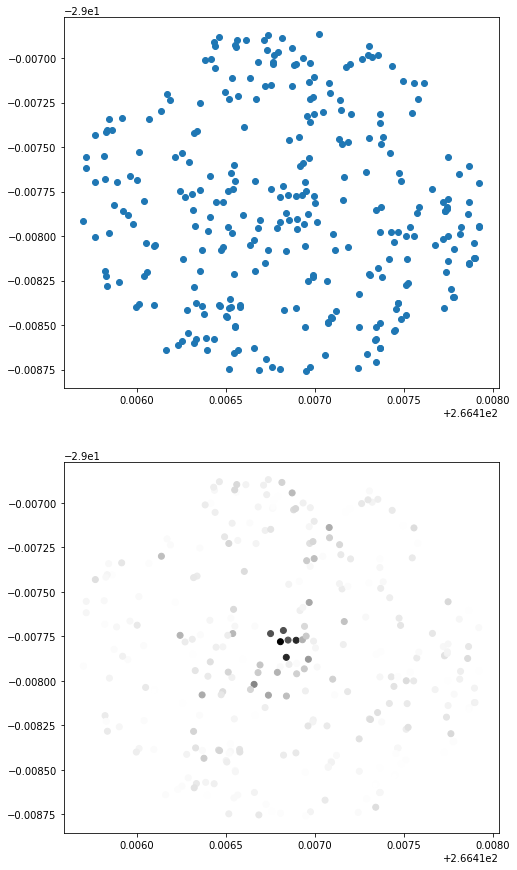

In [12]:
fig, ax = plt.subplots(2,1, figsize=(10,15))

ax[0].scatter(valid['ra'], valid['dec'])
ax[1].scatter(valid['ra'], valid['dec'], c=valid['pm_mag_inv']**4, cmap='gray')

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
plt.show()

In [13]:
# radiud of fov in pc
d = np.tan((np.pi*0.001)/(2*180)) * 8178
print(f"Each degree is {d} parsec")
d_km = d*30856775814913.67
print(f"Each degree is {d_km} km")

Each degree is 0.07136651311585977 parsec
Each degree is 2202140495908.181 km


In [14]:
ras = list(valid['ra'])
decs = list(valid['dec'])

origin = np.array([ras, decs])

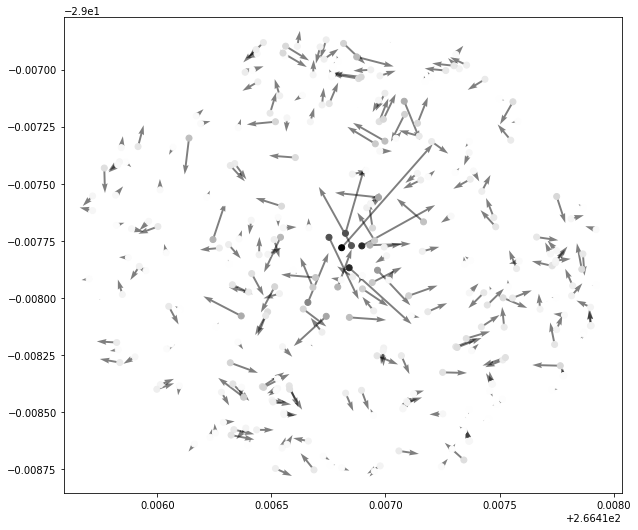

In [15]:
fig, ax = plt.subplots(figsize=(10,15))

ax.quiver(*origin, valid['pmra'], valid['pmdec'], alpha=0.5)
ax.scatter(valid['ra'], valid['dec'], c=valid['pm_mag_inv']**4, cmap='gray')

ax.set_aspect('equal')
plt.show()

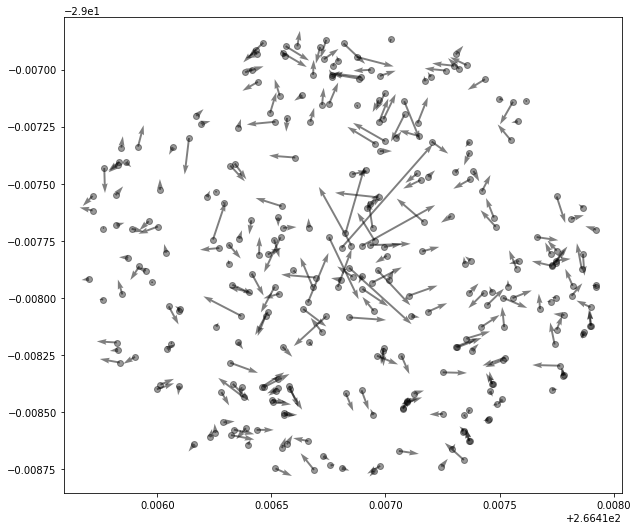

In [16]:
fig, ax = plt.subplots(figsize=(10,15))

ax.quiver(*origin, valid['pmra'], valid['pmdec'], alpha=0.5)
ax.scatter(valid['ra'], valid['dec'], c='k', alpha=0.4)

ax.set_aspect('equal')
plt.show()

In [17]:
valid.sort_values('update_date').tail(45)

,main_id,otype_txt,update_date,ra,dec,pmra,pmdec,rvz_redshift,sep,star,pm_mag,pm_mag_inv
200,"""GCIRS 33N""",s*b,"""2021-09-21""",266.416825,-29.008417,2.566,-6.049,0.000067,0.000592,True,43.174757,2106.365621
404,"""[RGH2007] GEN+0.41+1.59""",*,"""2021-09-21""",266.416975,-29.007357,4.100,0.000,NaN,0.000488,True,16.810000,2132.730378
559,"""GCIRS 29S""",*,"""2021-09-21""",266.416292,-29.007583,0.100,0.500,-0.000548,0.000519,True,0.260000,2149.280378
409,"""GCIRS 16SSW""",s*b,"""2021-09-21""",266.417070,-29.008253,2.700,-6.200,0.000387,0.000482,True,45.730000,2103.810378
44,"""[GKM98] S3-19""",*,"""2021-09-21""",266.416323,-29.008601,7.800,-1.500,-0.000380,0.000888,True,63.090000,2086.450378
45,"""[GKM98] S3-20""",*,"""2021-09-21""",266.417339,-29.008586,-0.300,1.400,NaN,0.000888,True,2.050000,2147.490378
421,"""[GKM98] S3-4""",*,"""2021-09-21""",266.417820,-29.007947,-2.500,5.700,NaN,0.000886,True,38.740000,2110.800378
451,"""[GKM98] S1-33""",*,"""2021-09-21""",266.416446,-29.007811,0.100,6.000,0.000010,0.000324,True,36.010000,2113.530378
43,"""GCIRS 35W""",WR*,"""2021-09-21""",266.417750,-29.008139,1.904,4.752,0.001091,0.000875,True,26.206720,2123.333658
92,"""GCIRS 16C""",WR*,"""2021-09-21""",266.417167,-29.007667,-9.000,7.800,0.000527,0.000345,True,141.840000,2007.700378


In [18]:
from astropy import units as u

pmra_deg_yr = np.array([(i*u.Unit('mas / yr')).to('deg / yr').value for i in valid['pmra']])
pmra_km_s = np.array([((i*d_km)*u.Unit('km / yr')).to('km/s').value for i in pmra_deg_yr])

pmdec_deg_yr = np.array([(i*u.Unit('mas / yr')).to('deg / yr').value for i in valid['pmdec']])
pmdec_km_s = np.array([((i*d_km)*u.Unit('km / yr')).to('km/s').value for i in pmdec_deg_yr])

In [19]:
valid['pm_mag_km_s'] = pmra_km_s**2 + pmdec_km_s**2

<ipython-input-19-ea1c788c7fc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pm_mag_km_s'] = pmra_km_s**2 + pmdec_km_s**2


In [21]:
valid.sort_values('pm_mag_km_s', ascending=False).head(45)

,main_id,otype_txt,update_date,ra,dec,pmra,pmdec,rvz_redshift,sep,star,pm_mag,pm_mag_inv,pm_mag_km_s
286,"""[SME2009] 1""",*,"""2015-11-30""",266.416808,-29.007780,30.627,34.807,NaN,0.000046,True,2149.540378,0.000000,0.807649
111,"""[EG97] S1""",*,"""2021-09-27""",266.416841,-29.007868,20.968,-18.949,NaN,0.000048,True,798.721625,1350.818753,0.300105
146,"""[SME2009] 4""",*,"""2015-11-30""",266.416896,-29.007772,24.634,13.688,NaN,0.000088,True,794.195300,1355.345078,0.298404
130,"""[EG97] S12""",*,"""2021-09-27""",266.416825,-29.007717,6.423,22.334,NaN,0.000108,True,540.062485,1609.477893,0.202918
220,"""[EG97] S31""",*,"""2021-09-27""",266.416753,-29.007734,9.965,-20.821,NaN,0.000106,True,532.815266,1616.725112,0.200195
87,"""[EG97] S2""",*,"""2021-11-30""",266.416851,-29.007771,-10.948,19.726,NaN,0.000062,True,508.973780,1640.566598,0.191237
59,"""[SME2009] 25""",*,"""2015-11-30""",266.416660,-29.008020,6.911,16.620,NaN,0.000238,True,323.986321,1825.554057,0.121732
116,"""[EG97] S8""",*,"""2021-09-27""",266.416965,-29.007879,11.035,-11.805,NaN,0.000140,True,261.129250,1888.411128,0.098114
289,"""[SME2009] 31""",*,"""2015-11-30""",266.416740,-29.008081,-10.917,-9.996,NaN,0.000264,True,219.100905,1930.439473,0.082323
97,"""[EG97] S67""",*,"""2021-03-30""",266.416970,-29.007559,-14.619,1.569,-0.000240,0.000297,True,216.176922,1933.363456,0.081224


In [22]:
valid['pm_mag_km_s'].describe()

count    299.000000
mean       0.021814
std        0.056975
min        0.000019
25%        0.003706
50%        0.010220
75%        0.020393
max        0.807649
Name: pm_mag_km_s, dtype: float64

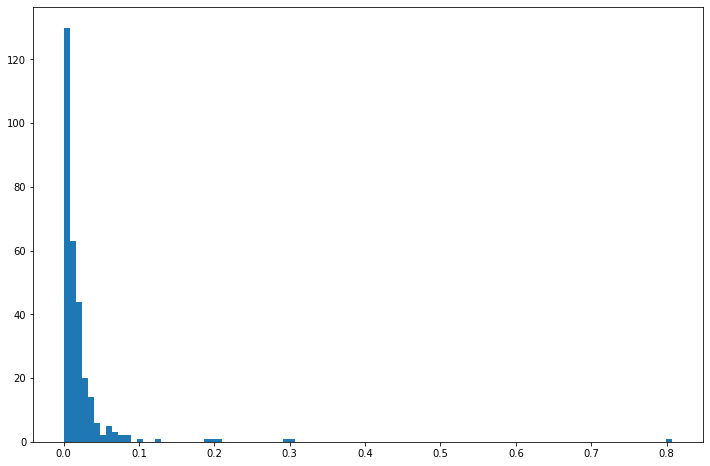

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(valid['pm_mag_km_s'], bins=100)
plt.show()